In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.decomposition import PCA 

In [6]:
from sklearn.preprocessing import StandardScaler 

In [7]:
%matplotlib inline

In [8]:
df = pd.read_csv(r'C:\Users\tomfu\Documents\crimes.csv', index_col=0)

In [9]:
df =  df.drop('mes_ano', axis=1)

In [10]:
df =  df.drop('municipio', axis=1)

In [11]:
df =  df.drop('regiao_rj', axis=1)

In [12]:
df =  df.drop('id_municipio', axis=1)

In [13]:
df =  df.drop('fase', axis=1)

In [14]:
df

,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,...,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias
ano,,,,,,,,,,,,,,,,,,,,,
2014,1,11,0,0,11,1,12,2,96,7,...,6,8,0,98,13,3,0,0,0,561
2014,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014,1,2,0,0,2,0,2,6,69,7,...,5,5,0,91,10,1,0,0,0,480
2014,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014,1,2,0,0,2,0,2,0,44,6,...,8,3,2,46,0,0,0,0,0,309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,6,0,0,0,0,0,0,1,38,3,...,14,19,1,32,1,1,0,0,0,339
2021,6,0,0,0,0,0,0,2,20,0,...,1,4,1,38,1,0,0,0,0,201
2021,6,0,0,0,0,0,0,0,4,0,...,0,1,0,0,1,0,0,0,0,19


In [15]:
# 1. Analise a matriz de correlações dos dados.

In [16]:
# Cálculo da matriz de correlações

In [17]:
corr = df.iloc[:,0:54].corr()

In [18]:
corr

,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,...,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias
mes,1.000000,-0.011205,0.012454,-0.017258,-0.011291,-0.013399,-0.012309,-0.005072,0.001928,0.004187,...,0.000625,0.016092,0.006687,0.000528,0.003872,-0.021587,0.001808,-0.003153,0.008280,0.000818
hom_doloso,-0.011205,1.000000,0.595346,0.745516,0.999093,0.824354,0.985189,0.918359,0.911097,0.923077,...,0.864105,0.830741,0.683115,0.900448,0.908846,0.802303,0.320833,0.530084,0.249204,0.914531
lesao_corp_morte,0.012454,0.595346,1.000000,0.525612,0.612640,0.583245,0.626488,0.583104,0.613856,0.623598,...,0.573490,0.565331,0.502646,0.602853,0.606709,0.544188,0.158468,0.400102,0.170258,0.635991
latrocinio,-0.017258,0.745516,0.525612,1.000000,0.771032,0.657923,0.766559,0.727110,0.710417,0.698106,...,0.709338,0.631360,0.536472,0.693580,0.715675,0.643995,0.240439,0.444383,0.179092,0.724461
cvli,-0.011291,0.999093,0.612640,0.771032,1.000000,0.827907,0.986890,0.920619,0.913465,0.924316,...,0.868133,0.832111,0.685976,0.902238,0.911479,0.805478,0.319939,0.534061,0.249061,0.917944
hom_por_interv_policial,-0.013399,0.824354,0.583245,0.657923,0.827907,1.000000,0.907573,0.805164,0.799290,0.835783,...,0.709083,0.754481,0.775113,0.781039,0.794451,0.696115,0.293519,0.505267,0.227503,0.850542
letalidade_violenta,-0.012309,0.985189,0.626488,0.766559,0.986890,0.907573,1.000000,0.920917,0.913870,0.932496,...,0.853975,0.840071,0.736603,0.900214,0.910991,0.803337,0.323986,0.545221,0.251926,0.931972
tentat_hom,-0.005072,0.918359,0.583104,0.727110,0.920619,0.805164,0.920917,1.000000,0.951345,0.927183,...,0.910969,0.856628,0.690512,0.944721,0.952330,0.854486,0.375111,0.558425,0.275556,0.949237
lesao_corp_dolosa,0.001928,0.911097,0.613856,0.710417,0.913465,0.799290,0.913870,0.951345,1.000000,0.959407,...,0.930000,0.911318,0.721425,0.995088,0.981611,0.872700,0.356405,0.531054,0.250749,0.983942
estupro,0.004187,0.923077,0.623598,0.698106,0.924316,0.835783,0.932496,0.927183,0.959407,1.000000,...,0.888070,0.897372,0.738147,0.953084,0.942411,0.834050,0.338994,0.520390,0.263456,0.961680


<AxesSubplot:>

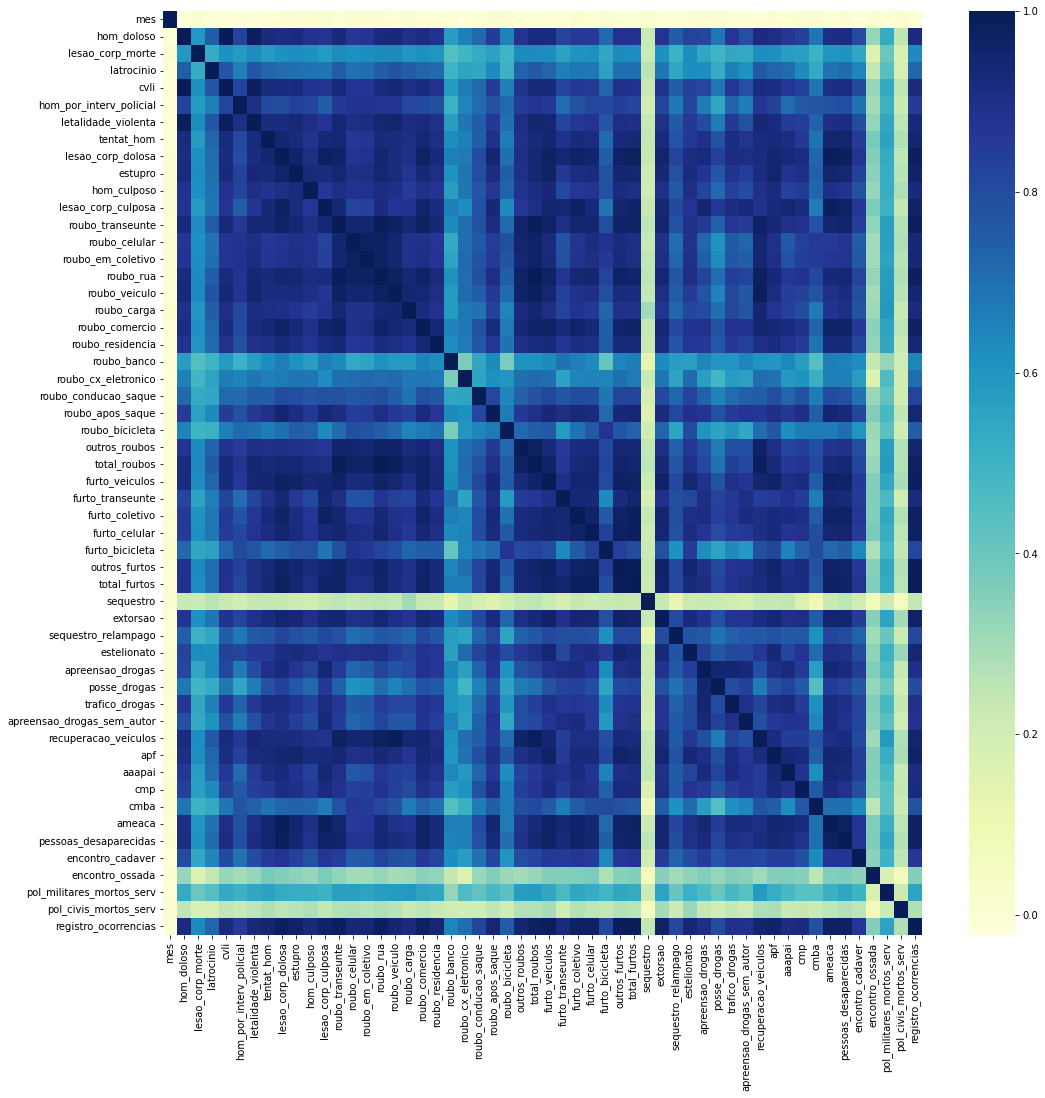

In [19]:
# Mapa de calor das correlações
f, ax = plt.subplots(figsize=(17,17))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap="YlGnBu")

In [20]:
# variâncias
np.diagonal(corr)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [21]:
X = np.matrix(df.iloc[:,0:54])
S = np.cov(np.transpose(X))

In [22]:
np.diagonal(S)

array([1.18781012e+01, 1.46606288e+02, 6.98255670e-02, 4.98867165e-01,
       1.63932152e+02, 2.42184888e+01, 2.92482516e+02, 3.34991003e+02,
       5.34544743e+04, 2.18160393e+02, 2.97428967e+01, 1.68171199e+04,
       1.26989860e+05, 9.67666505e+03, 4.41683600e+03, 2.65153075e+05,
       3.00584076e+04, 1.38985768e+03, 7.12449263e+02, 1.67365735e+01,
       3.37070745e-02, 1.23026466e-01, 3.19896727e-01, 2.93509802e+01,
       1.31695348e+00, 1.74014344e+04, 7.62391303e+05, 3.74282843e+03,
       2.24989830e+04, 3.47600837e+03, 8.68604788e+03, 8.02016535e+01,
       1.64632631e+05, 6.03357382e+05, 6.74519607e-03, 5.50971447e+01,
       5.76970835e-01, 4.05385228e+04, 3.53566783e+03, 8.68149153e+02,
       6.75369525e+02, 6.74324976e+01, 1.57286360e+04, 1.10679783e+04,
       7.61741391e+02, 3.68203883e+03, 9.09053271e+01, 4.19179186e+04,
       4.14791904e+02, 2.14932957e+00, 6.64646393e-02, 3.48679769e-02,
       2.41102423e-03, 1.02235100e+07])

In [23]:
pca = PCA(n_components=5)
pca.fit(X)

C:\Users\tomfu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


PCA(n_components=5)

In [24]:
# Pesos das componentes principais
pca.components_[0,:]

array([6.04525658e-07, 3.15440764e-03, 4.78608721e-05, 1.46148573e-04,
       3.34841708e-03, 1.19445301e-03, 4.54287009e-03, 4.94093334e-03,
       6.46310771e-02, 4.03729171e-03, 1.43557229e-03, 3.53571038e-02,
       1.00022265e-01, 2.62560448e-02, 1.77985033e-02, 1.44076813e-01,
       4.69545935e-02, 9.78435673e-03, 7.41310342e-03, 1.09295726e-03,
       3.38134584e-05, 7.02192381e-05, 1.31760399e-04, 1.44758023e-03,
       2.44798914e-04, 3.57813058e-02, 2.43276378e-01, 1.71692379e-02,
       3.93779716e-02, 1.63189755e-02, 2.57823993e-02, 2.08136591e-03,
       1.14464071e-01, 2.18948946e-01, 5.59123752e-06, 2.04352995e-03,
       1.75520403e-04, 5.38057565e-02, 1.51234191e-02, 6.65922066e-03,
       6.56429751e-03, 2.06622942e-03, 3.41681144e-02, 2.88190945e-02,
       7.13012352e-03, 1.58364670e-02, 2.12727838e-03, 5.67176120e-02,
       5.63430343e-03, 3.60979779e-04, 2.57012064e-05, 2.95664007e-05,
       3.84499184e-06, 9.09561091e-01])

In [25]:
# 3. Quantas componentes explicam ao menos 90% da variabilidade dos dados?
# Variância das componentes principais

pca.explained_variance_ratio_

array([9.93239961e-01, 4.72110701e-03, 7.88744448e-04, 5.91936665e-04,
       1.65042556e-04])

In [26]:
np.round(pca.explained_variance_ratio_,3)

array([0.993, 0.005, 0.001, 0.001, 0.   ])

In [27]:
pca.explained_variance_ratio_.cumsum()

array([0.99323996, 0.99796107, 0.99874981, 0.99934175, 0.99950679])

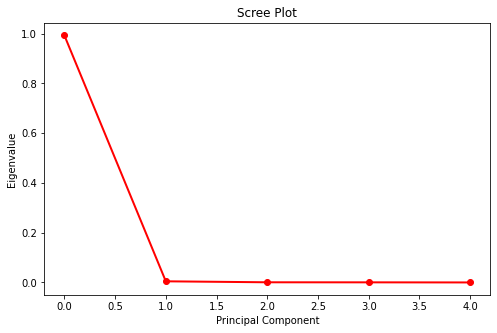

In [28]:
fig = plt.figure(figsize=(8,5))

plt.plot(pca.explained_variance_ratio_,  'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

plt.show()

In [29]:
pca.transform(X)

C:\Users\tomfu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


array([[-1.55420398e+02,  1.46705950e+02, -1.37690052e+01,
        -2.45471477e+01,  3.56603384e+01],
       [-7.31201512e+02, -1.14421151e+01,  1.73553132e+01,
         3.21608074e+01, -9.64622865e+00],
       [-2.40707950e+02,  1.16218869e+02, -1.45611111e+01,
        -2.33318708e+01,  2.52345669e+01],
       ...,
       [-7.13122738e+02, -6.77609683e+00,  1.27718674e+01,
         2.89891974e+01, -9.17590754e+00],
       [-6.10218412e+02,  1.83500416e+01, -6.71791261e+00,
         4.73177856e+00, -3.86520973e-01],
       [ 1.61053742e+02,  1.68467684e+02, -1.46900226e+02,
        -4.51779528e+01,  2.67329351e+01]])

In [30]:
# Vamos considerar 1 componentes principais
pca = PCA(n_components=1)
pca.fit(X)

pca.components_


C:\Users\tomfu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


array([[6.04525658e-07, 3.15440764e-03, 4.78608721e-05, 1.46148573e-04,
        3.34841708e-03, 1.19445301e-03, 4.54287009e-03, 4.94093334e-03,
        6.46310771e-02, 4.03729171e-03, 1.43557229e-03, 3.53571038e-02,
        1.00022265e-01, 2.62560448e-02, 1.77985033e-02, 1.44076813e-01,
        4.69545935e-02, 9.78435673e-03, 7.41310342e-03, 1.09295726e-03,
        3.38134584e-05, 7.02192381e-05, 1.31760399e-04, 1.44758023e-03,
        2.44798914e-04, 3.57813058e-02, 2.43276378e-01, 1.71692379e-02,
        3.93779716e-02, 1.63189755e-02, 2.57823993e-02, 2.08136591e-03,
        1.14464071e-01, 2.18948946e-01, 5.59123752e-06, 2.04352995e-03,
        1.75520403e-04, 5.38057565e-02, 1.51234191e-02, 6.65922066e-03,
        6.56429751e-03, 2.06622942e-03, 3.41681144e-02, 2.88190945e-02,
        7.13012352e-03, 1.58364670e-02, 2.12727838e-03, 5.67176120e-02,
        5.63430343e-03, 3.60979779e-04, 2.57012064e-05, 2.95664007e-05,
        3.84499184e-06, 9.09561091e-01]])

In [31]:
np.round(pca.components_[0],1)

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0.1,
       0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0.2, 0. , 0. , 0. , 0. , 0. , 0.1, 0.2, 0. , 0. , 0. , 0.1, 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0. ,
       0. , 0.9])

In [32]:
PCA1 = pca.transform(X)[:,0]


C:\Users\tomfu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [33]:
df['PCA1'] = PCA1


In [34]:
df.head()

,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,PCA1
ano,,,,,,,,,,,,,,,,,,,,,
2014,1,11,0,0,11,1,12,2,96,7,...,8,0,98,13,3,0,0,0,561,-155.420398
2014,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-731.201512
2014,1,2,0,0,2,0,2,6,69,7,...,5,0,91,10,1,0,0,0,480,-240.707950
2014,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-731.201512
2014,1,2,0,0,2,0,2,0,44,6,...,3,2,46,0,0,0,0,0,309,-402.306304


In [35]:
# 4. Proponha uma ordenação segundo a primeira componente principal.

df.sort_values(by='PCA1',ascending=False)

,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,PCA1
ano,,,,,,,,,,,,,,,,,,,,,
2019,3,91,3,3,97,62,159,213,2236,145,...,495,221,1901,168,19,1,2,0,35990,39337.274988
2014,3,111,2,4,117,21,138,156,3282,141,...,871,42,3068,230,18,1,0,0,36326,38897.495805
2017,5,135,0,7,142,52,194,189,2028,123,...,490,56,1776,183,7,1,0,0,35383,38894.107910
2014,1,113,3,5,121,32,153,192,3562,194,...,824,32,3469,254,21,0,0,0,36489,38666.533417
2017,3,127,3,7,137,62,199,166,1652,148,...,544,40,1226,162,6,0,1,0,34177,38035.974535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-731.201512
2015,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-731.201512
2015,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-731.201512


In [ ]:
Analisando, é possível perceber que somente uma PCA é necessária para representar as variáveis contidas na base de dados
(Só essa variável explica 99% dos dados). Isso é facilmente confirmado pois, de acordo com o aumento da quantidade de 
ocorrências, que é a nossa componente principal, obtemos o aumento de todas as outras variáveis em potencial, pois quanto maior
a quantidade de ocorrências maior a incidência de crimes diversos.